# projekt - Explorativní analýza marketingových dat banky

# Úvod


Dataset pochází z přímé marketingové kampaně portugalské banky. Marketingová strategie byla založena na telefonickém oslovení stávajících klientů banky. Klientům byl nabídnut produkt (bankovní termínovaný vklad).

####  Cíle:
1. Vyčistit dataset
2. Prozkoumat dataset
3. Vizualizovat dataset


#### Proměnné v datasetu:

- age : (numeric)
- job : type of job(categorical)
- marital : marital status (categorical)
- education (categorical)
- default: has credit in default? (categorical)
- housing: has housing loan? (categorical)
- loan: has personal loan? (categorical)
- contact: contact communication type (categorical) 
- month: last contact month of year (categorical)
- day_of_week: last contact day of the week (categorical)
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)     
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)
- y - has the client subscribed a term deposit? (binary)

#### Citace:
Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.


# Příprava dat

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [183]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";")
df = df[["age","job","marital","education","loan","day_of_week","month","duration","campaign","y"]]
df = df.rename(columns={"y": "converted"})

In [184]:
df.head()

,age,job,marital,education,loan,day_of_week,month,duration,campaign,converted
0,56,housemaid,married,basic.4y,no,mon,may,261,1,no
1,57,services,married,high.school,no,mon,may,149,1,no
2,37,services,married,high.school,no,mon,may,226,1,no
3,40,admin.,married,basic.6y,no,mon,may,151,1,no
4,56,services,married,high.school,yes,mon,may,307,1,no


In [185]:
df.describe()

,age,duration,campaign
count,41188.00000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593
std,10.42125,259.279249,2.770014
min,17.00000,0.000000,1.000000
25%,32.00000,102.000000,1.000000
50%,38.00000,180.000000,2.000000
75%,47.00000,319.000000,3.000000
max,98.00000,4918.000000,56.000000


In [186]:
df.describe(exclude=np.number)

,job,marital,education,loan,day_of_week,month,converted
count,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,5,10,2
top,admin.,married,university.degree,no,thu,may,no
freq,10422,24928,12168,33950,8623,13769,36548


In [187]:
df.shape

(41188, 10)

In [188]:
df.dtypes

age             int64
job            object
marital        object
education      object
loan           object
day_of_week    object
month          object
duration        int64
campaign        int64
converted      object
dtype: object

In [189]:
# Převod z object na category

for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype('category')

In [190]:
df.dtypes

age               int64
job            category
marital        category
education      category
loan           category
day_of_week    category
month          category
duration          int64
campaign          int64
converted      category
dtype: object

In [191]:
for col in df.select_dtypes(include='category',):
    print(f"Počet hodnot ve sloupci: '{col.upper()}':\n")
    print(df[col].value_counts())
    print("______________________________________\n")

Počet hodnot ve sloupci: 'JOB':

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
______________________________________

Počet hodnot ve sloupci: 'MARITAL':

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
______________________________________

Počet hodnot ve sloupci: 'EDUCATION':

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
______________________________________

Počet hodnot ve sloupci: 'LOAN':

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [192]:
unknown_values = df.applymap(lambda x: 'unknown' in str(x))
unknown_values.any()

age            False
job             True
marital         True
education       True
loan            True
day_of_week    False
month          False
duration       False
campaign       False
converted      False
dtype: bool

- V datasetu se nachází "unknown" hodnoty, která nahradíme NaN a následně z datasetu smažeme.

In [193]:
df.replace('unknown', np.nan, inplace=True)

In [194]:
df.dropna(how='any',inplace=True)

In [195]:
df.shape

(38245, 10)

In [196]:
for col in df.select_dtypes(include='category'):
    print(f"Unikátní kategorické hodnoty ve sloupci: '{col.upper()}':\n")
    print(df[col].astype(str).unique())
    print("_____________________________________________________________________\n")

Unikátní kategorické hodnoty ve sloupci: 'JOB':

['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
_____________________________________________________________________

Unikátní kategorické hodnoty ve sloupci: 'MARITAL':

['married' 'single' 'divorced']
_____________________________________________________________________

Unikátní kategorické hodnoty ve sloupci: 'EDUCATION':

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
_____________________________________________________________________

Unikátní kategorické hodnoty ve sloupci: 'LOAN':

['no' 'yes']
_____________________________________________________________________

Unikátní kategorické hodnoty ve sloupci: 'DAY_OF_WEEK':

['mon' 'tue' 'wed' 'thu' 'fri']
_____________________________________________________________________

Unikátní kategorické hodnoty ve sloupci: 'MONTH':

['may' 'j

#### Skewness

In [197]:
df.skew(numeric_only=True)

age         0.804117
duration    3.297411
campaign    4.719537
dtype: float64

- Šikmost numerických dat je větší než 0, data jsou pravostranně sešikmená. Většina hodnot je soustředěna na levé straně grafu a pravý ocas je delší než levý ocas. Distribuce dat je nesymetrická.

#### Missing values

In [198]:
df.isna().sum()

age            0
job            0
marital        0
education      0
loan           0
day_of_week    0
month          0
duration       0
campaign       0
converted      0
dtype: int64

- V datasetu se nenachází žádná chybějící data.

#### Duplicates

In [199]:
df.duplicated().sum()

32

In [200]:
df.drop_duplicates(inplace=True)

In [201]:
df.duplicated().sum()

0

- Duplicitní záznamy odstraněny

#### Statistical Summary

In [134]:
df.describe(include="all")

,age,job,marital,education,loan,day_of_week,month,duration,campaign,converted
count,38213.000000,38213,38213,38213,38213,38213,38213,38213.000000,38213.000000,38213
unique,NaN,11,3,7,2,5,10,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,thu,may,NaN,NaN,no
freq,NaN,9929,23161,11812,32255,7999,12780,NaN,NaN,33956
mean,39.862874,NaN,NaN,NaN,NaN,NaN,NaN,258.293617,2.567582,NaN
std,10.289652,NaN,NaN,NaN,NaN,NaN,NaN,259.872474,2.768327,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,NaN


#### Outliers

Zdá se, že v datasetu najdeme spoustu odlehlých hodnot. Pokud se zaměříme na dobu trvání hovoru (duration), tak si v tabulce můžeme všimnou u maximální hodnoty hodnoty 4918 sekund, což je přibližně 82 minut. Medián telefonních hovorů je přibližně 3 minuty. Tyto odlehlé hodnoty se pokusíme zredukovat. 

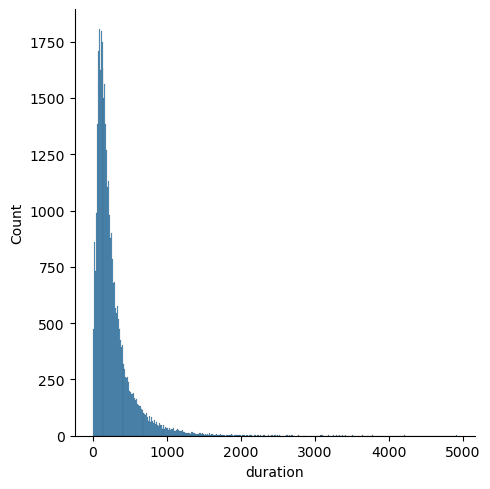

In [135]:
sns.displot(df["duration"])

<Axes: >

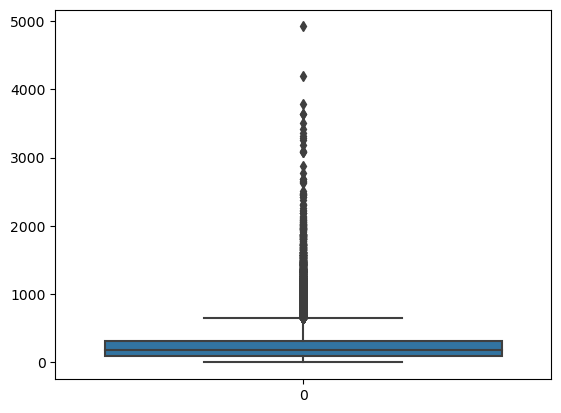

In [136]:
sns.boxplot(df["duration"])

In [137]:
upper_limit = df["duration"].mean() + 3*df["duration"].std()

In [138]:
lower_limit = df["duration"].mean() - 3*df["duration"].std()

In [139]:
print(upper_limit)
print(lower_limit)

1037.9110379055828
-521.3238031948824


In [140]:
df.loc[(df["duration"] > upper_limit) | (df["duration"] < lower_limit)]

,age,job,marital,education,loan,day_of_week,month,duration,campaign,converted
37,52,technician,married,basic.9y,no,mon,may,1666,1,no
75,41,blue-collar,divorced,basic.4y,no,mon,may,1575,1,yes
83,49,entrepreneur,married,university.degree,no,mon,may,1042,1,yes
88,49,technician,married,basic.9y,no,mon,may,1467,1,yes
164,39,services,divorced,high.school,no,mon,may,2033,1,no
...,...,...,...,...,...,...,...,...,...,...
40880,28,admin.,single,high.school,no,wed,oct,1246,2,yes
40970,24,admin.,single,university.degree,no,fri,oct,1176,3,yes
41121,46,admin.,single,university.degree,no,tue,nov,1166,3,no
41123,36,blue-collar,single,basic.6y,no,tue,nov,1556,4,yes


In [141]:
duration_df = df.loc[(df["duration"] < upper_limit) & (df["duration"] > lower_limit)]

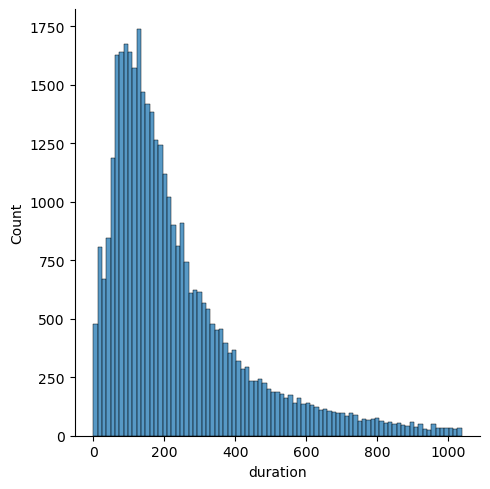

In [142]:
sns.displot(duration_df["duration"])

<Axes: >

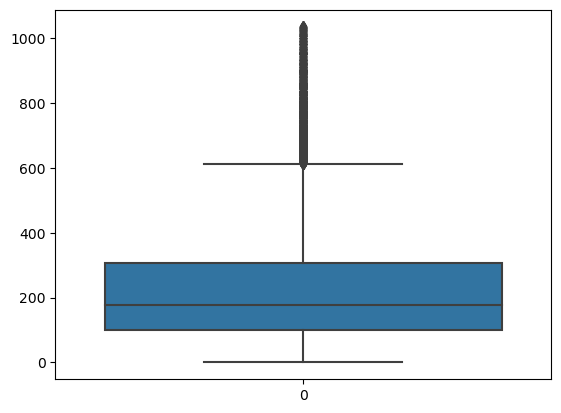

In [143]:
sns.boxplot(duration_df["duration"])

# Explorativní analýza dat

## 1.0 Age

<Axes: xlabel='age', ylabel='Count'>

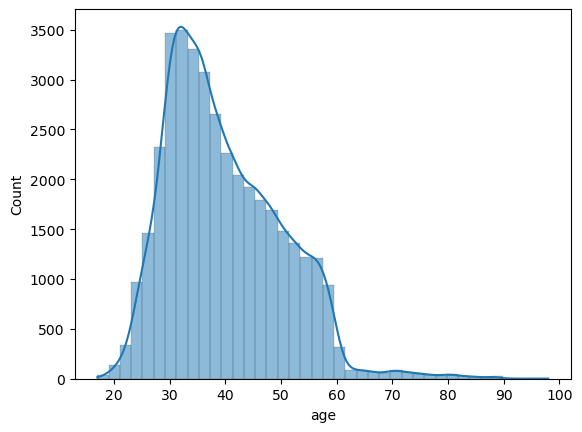

In [144]:
sns.histplot(df['age'], bins=40, kde=True, linewidth=0.1)

In [145]:
df["age"].skew()

0.8037021317459829

In [146]:
df.age.median()

38.0

Medián věku je 38 let.

In [147]:
round(df.age.describe())

count    38213.0
mean        40.0
std         10.0
min         17.0
25%         32.0
50%         38.0
75%         47.0
max         98.0
Name: age, dtype: float64

- Minimální věk: 17
- Maximální věk: 98
- Průměrný věk: 40
- až 75 % lidí má věk menší nebo rovný 47 let.
- Asymetrické rozdělení. Průměr je větší než medián.
- Graf nám ukazuje přítomnost odlehlých hodnot, které mají vliv na průměr a šikmost.

In [148]:
(df[df['converted'] == 'yes'].pivot_table(values=['converted'], index='age', aggfunc='count')
                             .sort_values(by='converted', ascending=False))


,converted
age,
33,205
31,205
30,188
29,179
34,176
...,...
86,3
84,2
89,2


- Nejvíce konverzí (205) bylo zaznamenáno u lidí s věkem 33 a 31 let.

In [149]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['17-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
pivot_table_df = df[df['converted'] == 'yes'].pivot_table(values='converted', index='age_group', aggfunc=['count'])
pivot_table_df


,count
,converted
age_group,
17-20,16
21-30,809
31-40,1627
41-50,762
51-60,642
61+,401


Lidé vě věku 31 až 40 let (1627) reagovali nejlépe na nabídku banky.

Text(0.5, 1.0, 'Konverze dle věkových skupin')

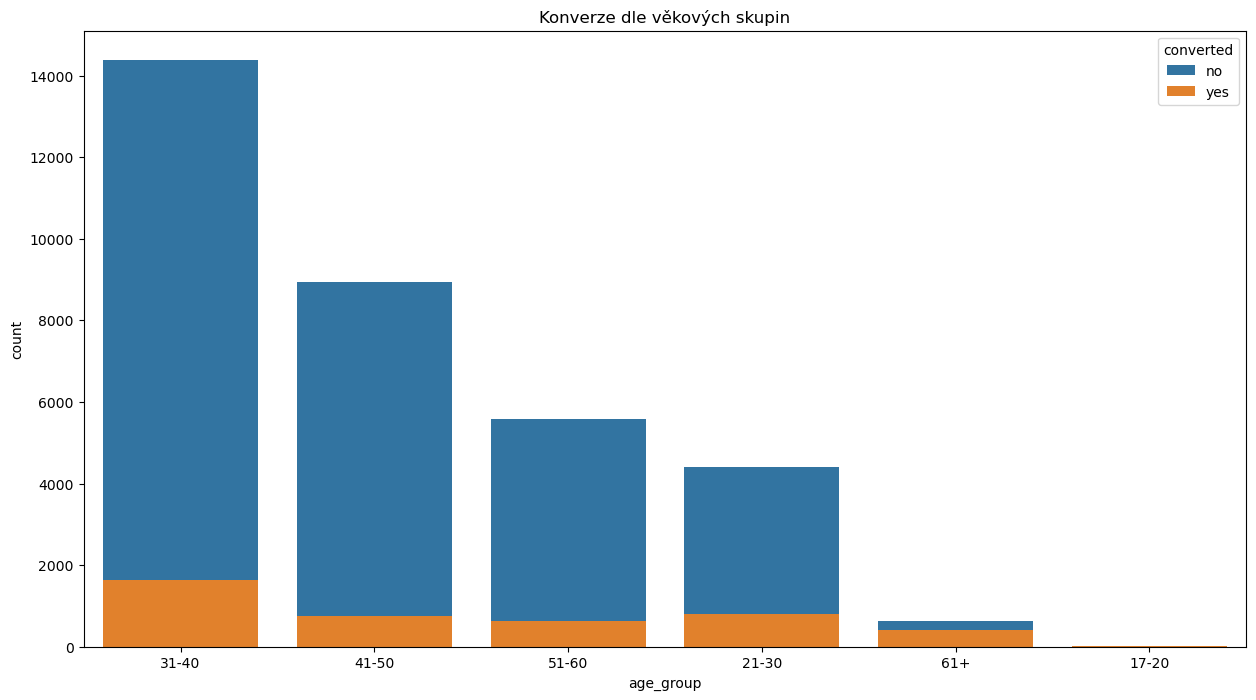

In [150]:
plt.subplots(figsize = ((15,8)))
sns.countplot(x="age_group", data=df, hue="converted", dodge=False, order=df.age_group.value_counts().index)
plt.title("Konverze dle věkových skupin")

## 1.1 - Job

### 1.1.1 - Jaké je rozdělení zaměstnanců dle kategorie zaměstnání?

In [151]:
df["job"].value_counts()

admin.           9929
blue-collar      8549
technician       6375
services         3711
management       2727
retired          1576
entrepreneur     1360
self-employed    1349
housemaid         986
unemployed        963
student           688
Name: job, dtype: int64

- V datasetu se nachází nejčastěji lidé, kteří pracují na administrativní pozici. (9929)

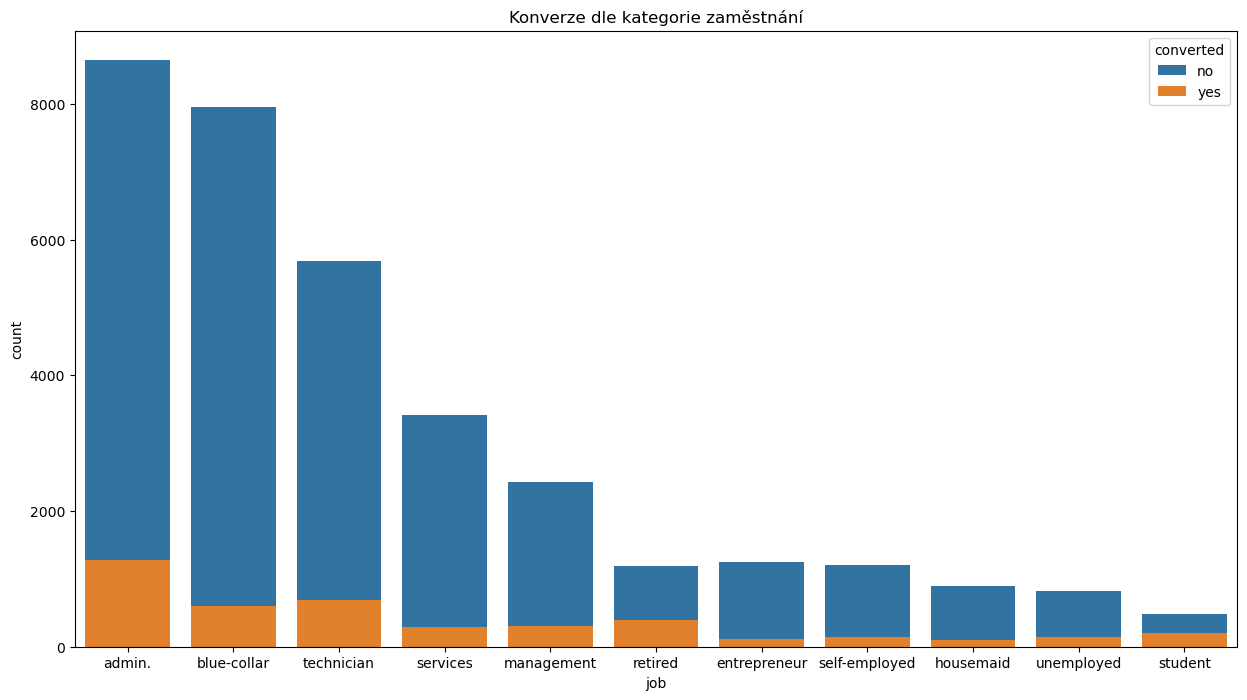

In [152]:
plt.subplots(figsize = ((15,8)))
sns.countplot(x = "job", data=df, hue="converted", dodge=False, order=df.job.value_counts().index)
plt.title("Konverze dle kategorie zaměstnání")
plt.show()


### 1.1.2 - U které pracovní oblasti bylo zaznamenáno nejvíce konverzí?

In [153]:
(df[df['converted'] == 'yes'].pivot_table(values=['converted'], index='job', aggfunc='count').sort_values(by='converted', ascending=False))

,converted
job,
admin.,1282
technician,683
blue-collar,595
retired,390
management,304
services,297
student,208
self-employed,146
unemployed,138


- Nejvyšší počet konverzí byl zaznamenán u lidí, kteří pracují v administrativní oblasti. (1282)

## 1.2 - Marital

### 1.2.1 Jaký je počet lidí v jednotlivých kategoriích rodinného stavu?


In [154]:
df["marital"].value_counts()

married     23161
single      10751
divorced     4301
Name: marital, dtype: int64

Rodinný stav
- 23161 lidí je v manželství.
- 10751 lidí je svobodných.
- 4301 lidí je rozvedených.

### 1.2.2 - Jaký je průměrný věk v jednotlivých kategoriích rodinného stavu?

In [155]:
# Průměrný věk dle rodinného stavu
df.groupby('marital')['age'].mean().astype("int64")

marital
divorced    44
married     42
single      33
Name: age, dtype: int64

Rodinný stav
- Průměrný věk lidí, kteří jsou rozvedení je 44 let.
- Průměrný věk lidí, kteří jsou v manželství je 42 let.
- Průměrný věk lidí, kteří jsou svobodní je 33 let.

### 1.2.3 - U jakého rodinného stavu bylo zaznamenáno nejvíce konverzí?

In [156]:
(df[df['converted'] == 'yes'].pivot_table(values=['converted'], index='marital', aggfunc='count').sort_values(by='converted', ascending=False))

,converted
marital,
married,2340
single,1469
divorced,448


- Nejvíc konverzí (2340) bylo zaznamenáno u lidí v manželství (married).

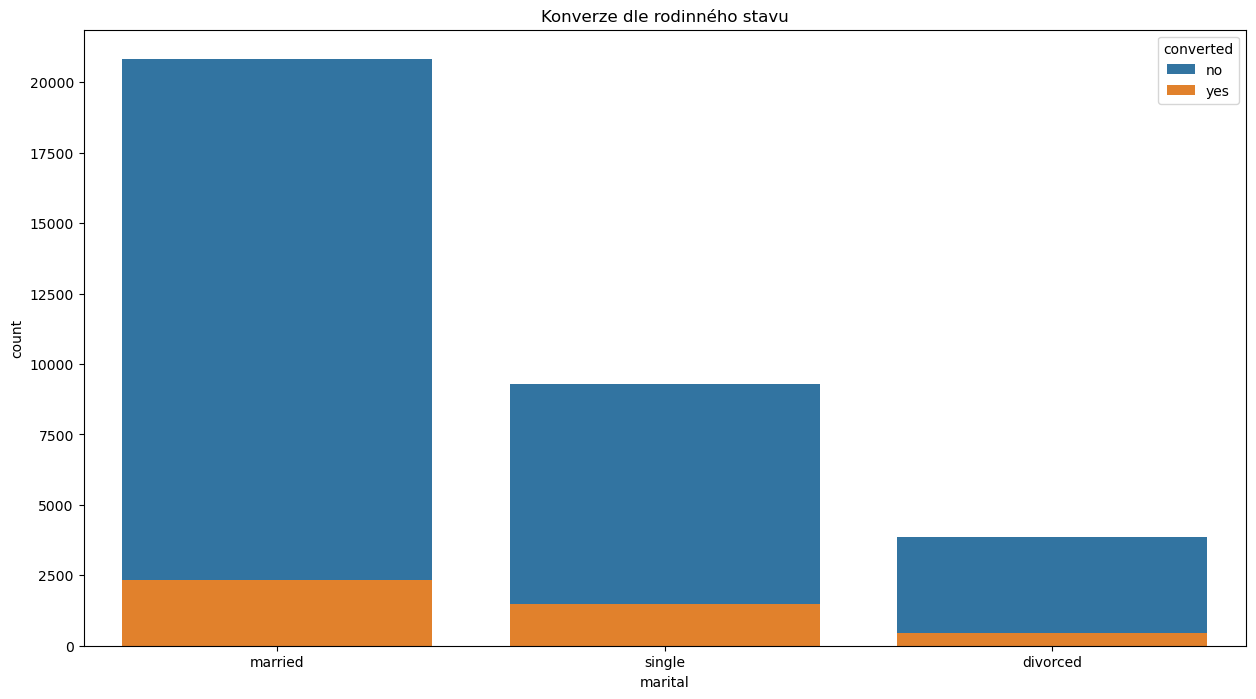

In [157]:
plt.subplots(figsize = ((15,8)))
sns.countplot(x="marital", data=df, hue="converted", dodge=False, order=df.marital.value_counts().index)
plt.title("Srovnání rodinného stavu mezi lidmi, kteří přijali a nepřijali nabídku banky")
plt.title("Konverze dle rodinného stavu")
plt.show()

## 1.3 - Education

### 1.3.1 Jaký je počet lidí v jednotlivých kategoriích vzdělání?


In [158]:
df["education"].value_counts()

university.degree      11812
high.school             9237
basic.9y                5850
professional.course     5096
basic.4y                3999
basic.6y                2201
illiterate                18
Name: education, dtype: int64

- Lidé s vysokoškolským vzděláním (11812) se nacházejí v datasetu nejčastěji.

### 1.3.2 U jaké kategorie vzdělání bylo zaznamenáno nejvíce konverzí?



In [159]:
(df[df['converted'] == 'yes'].pivot_table(values=['converted'], index='education', aggfunc='count').sort_values(by='converted', ascending=False))

,converted
education,
university.degree,1619
high.school,1007
professional.course,578
basic.9y,457
basic.4y,412
basic.6y,180
illiterate,4


- Nejvíc konverzí (1619) bylo zaznamenáno u lidí s vysokoškolským vzděláním (university.degree).

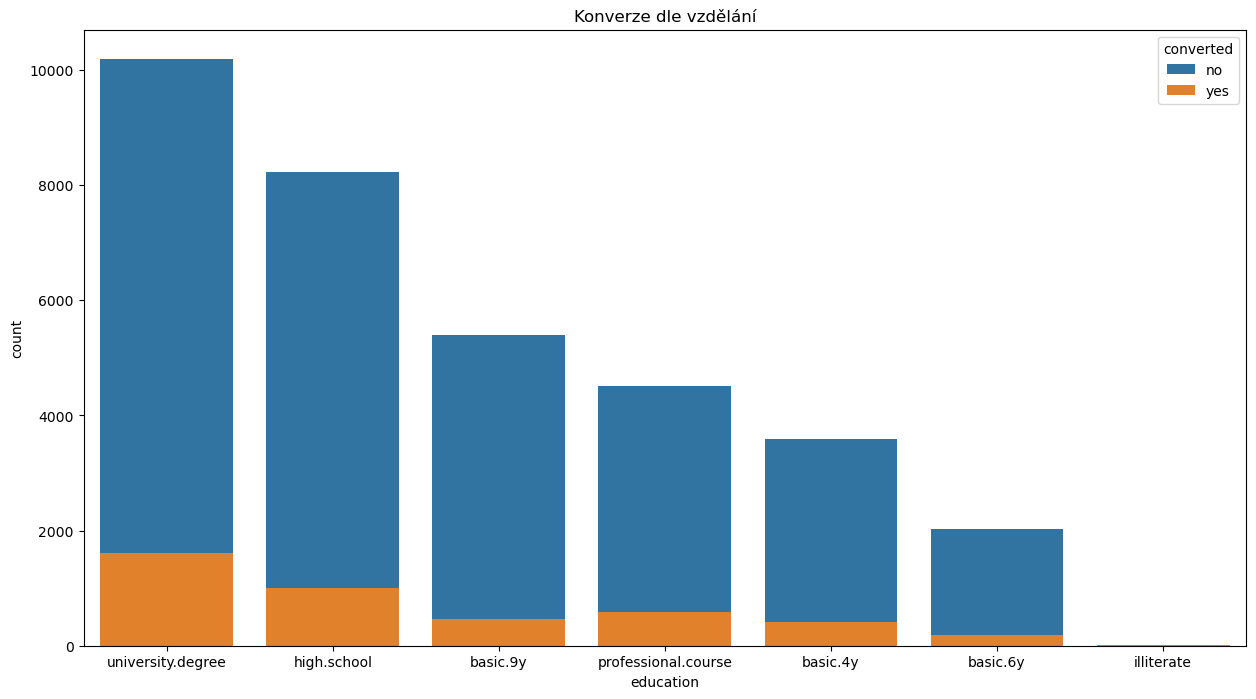

In [160]:
plt.subplots(figsize = ((15,8)))
sns.countplot(x="education", data=df, hue="converted", dodge=False, order=df.education.value_counts().index)
plt.title("Konverze dle vzdělání")
plt.show()

## 1.4 - Loan

### 1.4.1 - Kolik lidí má u banky půjčku?

In [161]:
df["loan"].value_counts()

no     32255
yes     5958
Name: loan, dtype: int64

- Počet lidí s půjčkou je 32255.
- Počet lidí bez půjčky je 5958. 

### 1.4.2 - Kolik lidí s půjčkou a bez půjčky provedlo konverzi?

In [162]:
df[df['converted'] == 'yes'].pivot_table(values=['converted'], index='loan', aggfunc='count')

,converted
loan,
no,3618
yes,639


- Lidé s půjčkou přijali nabídku banky v 639 případech.
- Lidé bez půjčky přijali nabídku banky v 3618 případech.

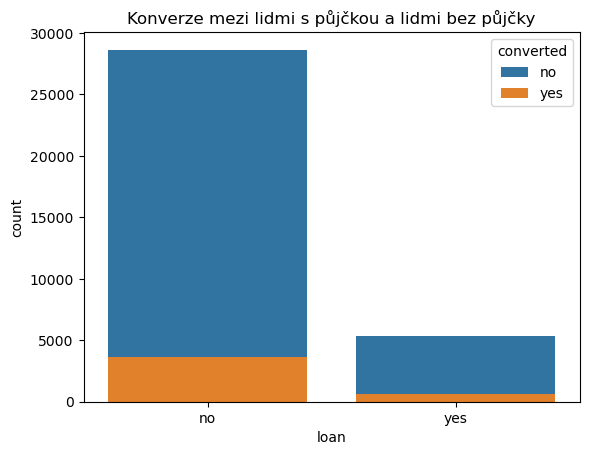

In [163]:
sns.countplot(x="loan", data=df, hue="converted", dodge=False, order=df.loan.value_counts().index)
plt.title("Konverze mezi lidmi s půjčkou a lidmi bez půjčky")
plt.show()

## 1.5 - Konverze

### 1.5.1 - Kolik zaznamenala marketingová kampaň konverzí?

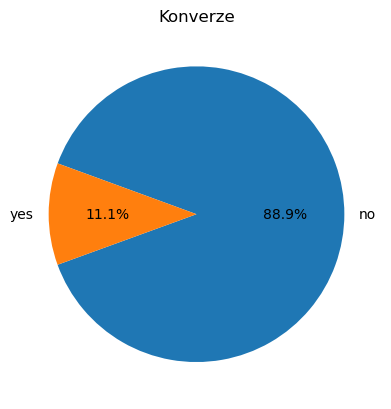

In [164]:
converted = df['converted'].value_counts()
labels = df['converted'].value_counts(sort = True).index
plt.pie(converted, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title("Konverze")
plt.show()

In [165]:
df[df['converted'] == 'yes']['converted'].value_counts()

yes    4257
no        0
Name: converted, dtype: int64

- Marketingová kampaň zaznamenala 4257 konverzí, tedy lidí, kteří souhlasili s nabídkou banky.

## 1.6 - Call duration

In [166]:
(duration_df["duration"]/60).describe()

count    37418.000000
mean         3.902213
std          3.199750
min          0.000000
25%          1.683333
50%          2.933333
75%          5.100000
max         17.283333
Name: duration, dtype: float64

In [167]:
(duration_df["duration"]/60).median()

2.933333333333333

- Medián doby hovoru: 2.93 minuty

### 1.6.1 - Jaký byl medián délky hovoru v minutách pro jednotlivé pracovní dny v týdnu?

In [168]:
call_pivot = duration_df.pivot_table(values=['duration'], index='day_of_week', aggfunc=["median"])
call_pivot['median'] /= 60
round(call_pivot,2)

,median
,duration
day_of_week,
fri,2.80
mon,2.82
thu,2.98
tue,3.02
wed,3.02


### 1.6.2 - Má délka hovoru vliv na konverzi zákazníka? (Korelace)

In [169]:
duration_df.pivot_table(values=['duration'], index='converted', aggfunc=lambda x: x.median() / 60)

,duration
converted,
no,2.700000
yes,6.633333


In [170]:
# Korelace
stats.pearsonr(duration_df['duration'], duration_df['converted'].map({'yes': 1, 'no': 0}))[0]


0.37854757847591697

- H0: Korelační koeficient není významný.
- H1: non H0
- alfa = 0.05

In [171]:
p_value = stats.pearsonr(duration_df['duration'], duration_df['converted'].map({'yes': 1, 'no': 0}))[1]
format(p_value, '.10f')

'0.0000000000'

#### Test významnosti
- výsledek: alfa > p_value
- Na 5 % hladině významnosti zamítáme H0 o nevýznamnosti korelačního koeficientu, přijímáme H1.
- Korelace mezi délkou hovoru (duration) a konverzemi (converted) o hodnotě 0.378, je pozitivní, ale spíše slabší. 
- Delší hovory vedou k většímu počtu konverzí.

## 1.7 - Day of Week

### 1.7.1 - Který den v týdnu bylo v součtu osloveno nejvíce zákazníků?


In [172]:
df.pivot_table(values=['converted'], index='day_of_week', aggfunc='count').sort_values(by='converted', ascending=False)


,converted
day_of_week,
thu,7999
mon,7924
wed,7595
tue,7474
fri,7221


- čtvrtek (7999)

Text(0.5, 1.0, 'Počet obvolaných zákazníků dle dne v týdnu')

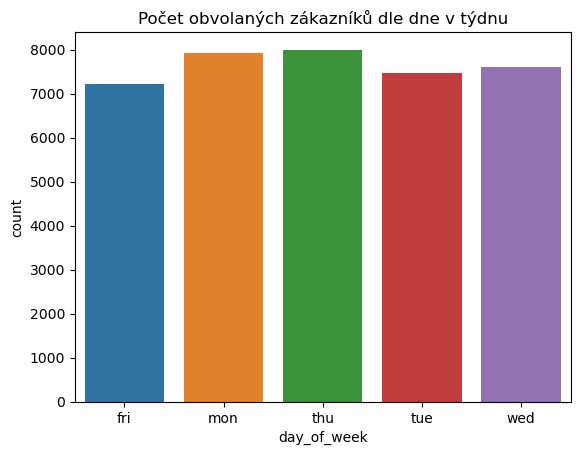

In [173]:
sns.countplot(x=df.day_of_week, data=df)
plt.title("Počet obvolaných zákazníků dle dne v týdnu")

### 1.7.2 - Který den v týdnu zaznamenal nejvíce konverzí?


In [174]:
call_day = (df.pivot_table(values='converted', index='day_of_week', aggfunc=lambda x: (x == 'yes')
              .sum()).sort_values(by='converted', ascending=False))
call_day

,converted
day_of_week,
thu,961
wed,875
tue,864
mon,786
fri,771


- čtvrtek (961)

Text(0.5, 1.0, 'Konverze dle dne v týdnu')

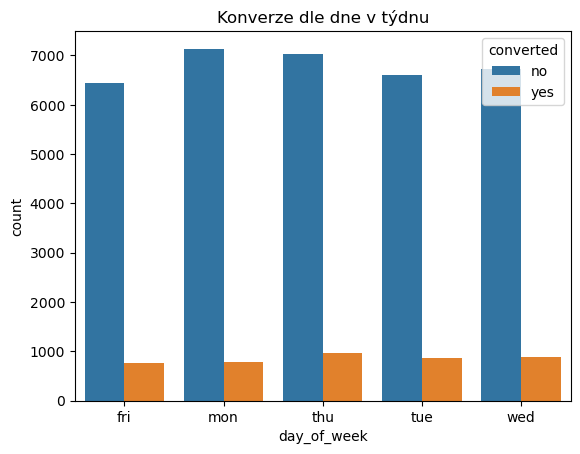

In [175]:
sns.countplot(x=df.day_of_week, hue="converted", data=df)
plt.title("Konverze dle dne v týdnu")

## 1.8 - Call Month

### 1.8.1 - Kolik hovorů se uskutečnilo v jednotlivých měsících?

In [176]:
df.pivot_table(values='converted', index='month', aggfunc="count").sort_values(by='converted', ascending=False)

,converted
month,
may,12780
jul,6623
aug,5818
jun,4846
nov,3894
apr,2434
oct,658
sep,502
mar,497


### 1.8.2 - Jaký byl nejlepší měsíc v počtu konverzí?

In [177]:
(df.pivot_table(values='converted', index='month', aggfunc=lambda x: (x == 'yes')
                .sum()).sort_values(by='converted', ascending=False))

,converted
month,
may,830
jul,598
aug,596
jun,511
apr,486
nov,385
oct,297
mar,252
sep,225


- Nejlepší měsíc v počtu konverzí: byl květen (may - 830) s počtem obvolaných zákazníků (12780)
- Druhým nejlepším měsícem byl červenec (jul - 598), oproti květnu byl obvolán skoro povoloviční počet zákazníků. 

Text(0.5, 1.0, 'Konverze dle měsíce')

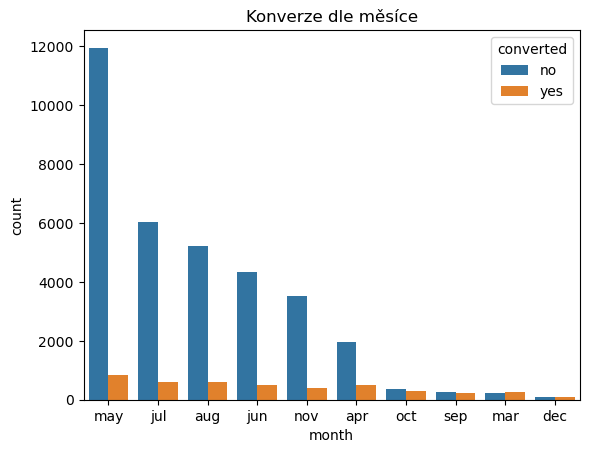

In [178]:
sns.countplot(x='month', hue='converted', data = df[['month', 'converted']],order = df['month'].value_counts().index)
plt.title("Konverze dle měsíce")

Text(0.5, 1.0, 'Počet obvolaných zákazníků dle měsíce')

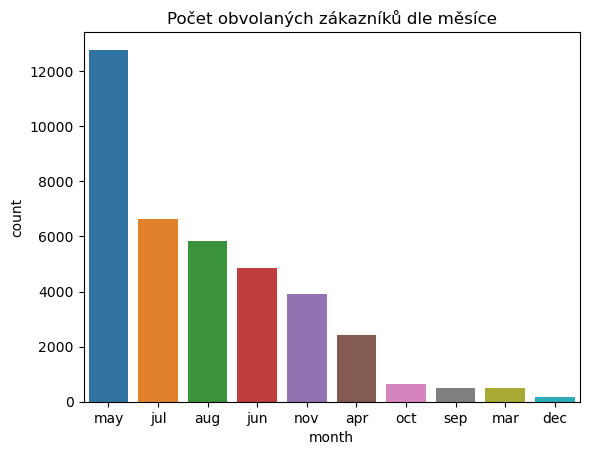

In [179]:
sns.countplot(x='month', data = df[['month']],order=df['month'].value_counts().index)
plt.title("Počet obvolaných zákazníků dle měsíce")